# Statistical Machine Learning Exercise 6
- Laura Haege
- Philipp Noel von Bachmann, Matrikelnummer: 4116220

In [3]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad
import matplotlib.pyplot as plt
%matplotlib inline
def cost_fn(w, x, y, lmbd):
    ''' L1 loss + L2 regularization

    w: weights to estimate d
    x: data points n x d
    y: true values n x 1
    lmbd: weight regularization

    output: loss ||x * w - y||_1 + lmbd * ||w||_2^2
    '''
    return np.abs(x @ np.expand_dims(w, 1) - y).sum() +\
           lmbd * (w ** 2).sum()

def L1LossRegression(X, Y, lmbd_reg=0.):
    ''' solves linear regression with
    L1 Loss + L2 regularization

    X: deisgn matrix n x d
    Y: true values n x 1
    lmbd_reg: weight regularization

    output: weight of linear regression d x 1
    '''
    w = minimize(cost_fn, np.zeros(X.shape[1]),
                 args=(X, Y, lmbd_reg)).x
    return w

## (a)

In [4]:
def cost_fn_square(w, x, y, lmbd):
    return np.square(x @ np.expand_dims(w, 1) - y).sum() +\
        lmbd * (w ** 2).sum()

def RidgeRegression(X, Y, lmbd_reg=0.):
    w = minimize(cost_fn_square, np.zeros(X.shape[1]),
                args=(X, Y, lmbd_reg)).x
    return w

def LeastSquares(X, Y):
    return RidgeRegression(X, Y, 0.)

## (b)

In [5]:
def Basis(X,k):
    basis_data = np.zeros((X.shape[0], 2*k+1))
    basis_data[:, 0] = np.ones(X.shape[0])
    for freq in range(1, 2*k+1, 2):
        basis_data[:, freq] = np.squeeze(np.cos(2 * np.pi * freq * X))
        basis_data[:, freq+1] = np.squeeze(np.sin(2 * np.pi * freq * X))
    return basis_data

## (c)


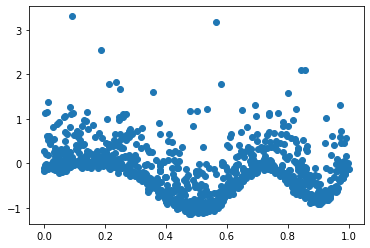

In [6]:
# first load the data
data = np.load("onedim_data.npy", allow_pickle=True).item()
x_train = data["Xtrain"]
y_train = data["Ytrain"]
x_test = data["Xtest"]
y_test = data["Ytest"]

# plot the data
plot_x = np.linspace(0, 1, 1000)
plt.scatter(np.squeeze(x_train), np.squeeze(y_train))
plt.show()

Because the data contains some outliers, we choose the $L_1$ loss, as it is less sensitive to outliers.

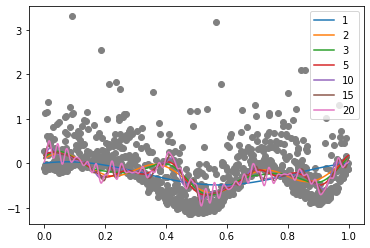

In [7]:
# first add the data to the plot
plot_x = np.linspace(0, 1, 1000)
plt.scatter(np.squeeze(x_train), np.squeeze(y_train), color="grey")

k_list = [1,2,3,5,10,15,20]
# performance tracking
train_losses = []
test_losses = []

lambda_regularization = 30
for k in k_list:
    x_train_mapped = Basis(x_train, k)
    w = L1LossRegression(x_train_mapped, y_train, lambda_regularization)
    train_losses.append(cost_fn(w, x_train_mapped, y_train, lambda_regularization)/x_train.shape[0])
    test_losses.append(cost_fn(w, Basis(x_test, k), y_test, lambda_regularization)/(x_test.shape[0]))
    plt.plot(plot_x, np.squeeze(Basis(plot_x, k) @ np.expand_dims(w, 1)), label=str(k))

plt.legend()
plt.show()

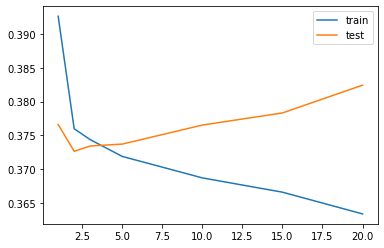

In [8]:
# plot the loss
plt.plot(k_list, train_losses, label="train")
plt.plot(k_list, test_losses, label="test")
plt.legend()
plt.show()

The same for $\lambda = 0$:

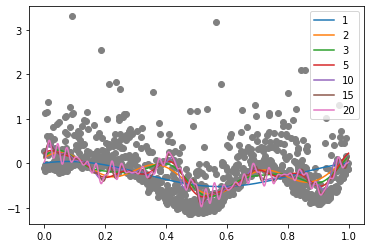

In [9]:
# first add the data to the plot
plot_x = np.linspace(0, 1, 1000)
plt.scatter(np.squeeze(x_train), np.squeeze(y_train), color="grey")

k_list = [1,2,3,5,10,15,20]
# performance tracking
train_losses = []
test_losses = []

lambda_regularization = 0
for k in k_list:
    x_train_mapped = Basis(x_train, k)
    w = L1LossRegression(x_train_mapped, y_train, lambda_regularization)
    train_losses.append(cost_fn(w, x_train_mapped, y_train, lambda_regularization)/x_train.shape[0])
    test_losses.append(cost_fn(w, Basis(x_test, k), y_test, lambda_regularization)/(x_test.shape[0]))
    plt.plot(plot_x, np.squeeze(Basis(plot_x, k) @ np.expand_dims(w, 1)), label=str(k))

plt.legend()
plt.show()

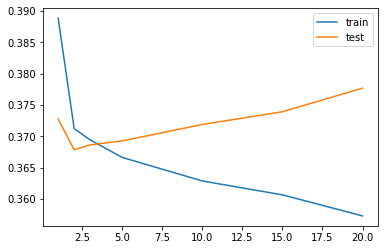

In [10]:
# plot the loss
plt.plot(k_list, train_losses, label="train")
plt.plot(k_list, test_losses, label="test")
plt.legend()
plt.show()

We see that with increasing $k$, we learn more non smooth functions. This initially leads to a  reduced bias, and  a lower loss on the test set. Higher $k$ however increase variance, which can be seen as the loss of the test set stops to lower at $k=2$ and from then on stays nearly constant.

## (d)

\begin{align*}
\Omega(\psi_i)
&= \int_0^1 \vert \psi_i' (x) \vert^2 dx\\
&= \int_0^1 \vert (\frac{1}{\sqrt{\Omega (\phi_i)}} \cdot \phi_i(x))' \vert^2 dx\\
&= \int_0^1 \vert \frac{1}{\sqrt{\Omega (\phi_i)}} \cdot \phi_i(x)' \vert^2 dx\\
&= \int_0^1 (\frac{1}{\sqrt{\Omega (\phi_i)}})^2 \cdot \vert  \phi_i(x)' \vert^2 dx\\
&= \frac{1}{\Omega (\phi_i)} \cdot \int_0^1  \vert  \phi_i(x)' \vert^2 dx\\
&= \frac{1}{\Omega (\phi_i)} \cdot \Omega (\phi_i)\\
&= 1\\
\end{align*}

In [11]:
# integral of Omega(f)
def omega(f, freq):
    if f == "sin":
        outer_derivative = np.cos
    else:
        outer_derivative = np.sin
    return np.sqrt(quad(lambda x: np.square(outer_derivative(2*np.pi*freq * x) * 2 * np.pi * freq), 0, 1)[0])


def FourierBasisNormalized(X, k):
    basis_data = np.zeros((X.shape[0], 2*k+1))
    basis_data[:, 0] = np.ones(X.shape[0])
    for freq in range(1, 2*k+1, 2):
        basis_data[:, freq] = np.squeeze(np.cos(freq * X))/omega("cos", freq)
        basis_data[:, freq+1] = np.squeeze(np.sin(freq * X))/omega("sin", freq)
    return basis_data


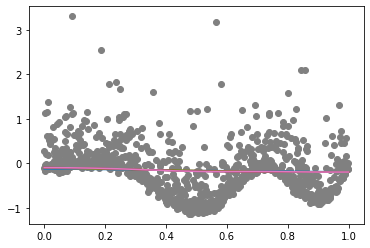

In [12]:
# plot for lambda = 30
plot_x = np.linspace(0, 1, 1000)
plt.scatter(np.squeeze(x_train), np.squeeze(y_train), color="grey")

k_list = [1,2,3,5,10,15,20]
# figs, axs = plt.subplots(len(k_list))
train_losses = []
test_losses = []
lambda_regularization = 30
for index, k in enumerate(k_list):
    x_train_mapped = FourierBasisNormalized(x_train, k)
    w = RidgeRegression(x_train_mapped, y_train, lambda_regularization)
    train_losses.append(cost_fn(w, x_train_mapped, y_train, lambda_regularization)/x_train.shape[0])
    test_losses.append(cost_fn(w, FourierBasisNormalized(x_test, k), y_test, lambda_regularization)/(x_test.shape[0]))
    plt.plot(plot_x, np.squeeze(FourierBasisNormalized(plot_x, k) @ np.expand_dims(w, 1)))

plt.show()

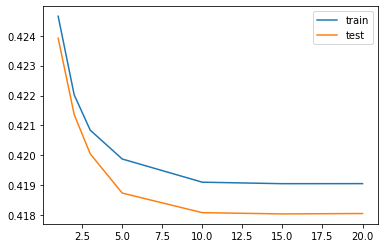

In [13]:
# plot the loss
plt.plot(k_list, train_losses, label="train")
plt.plot(k_list, test_losses, label="test")
plt.legend()
plt.show()

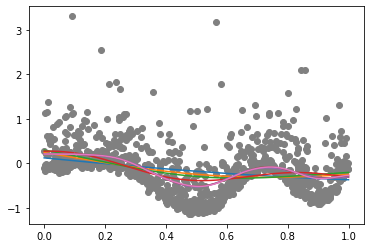

In [14]:
# plot for lambda = 0.5
plot_x = np.linspace(0, 1, 1000)
plt.scatter(np.squeeze(x_train), np.squeeze(y_train), color="grey")

k_list = [1,2,3,5,10,15,20]
# figs, axs = plt.subplots(len(k_list))
train_losses = []
test_losses = []
lambda_regularization = 0.5
for index, k in enumerate(k_list):
    x_train_mapped = FourierBasisNormalized(x_train, k)
    w = RidgeRegression(x_train_mapped, y_train, lambda_regularization)
    train_losses.append(cost_fn(w, x_train_mapped, y_train, lambda_regularization)/x_train.shape[0])
    test_losses.append(cost_fn(w, FourierBasisNormalized(x_test, k), y_test, lambda_regularization)/(x_test.shape[0]))
    plt.plot(plot_x, np.squeeze(FourierBasisNormalized(plot_x, k) @ np.expand_dims(w, 1)))

plt.show()

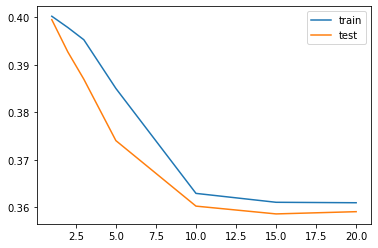

In [15]:
# plot the loss
plt.plot(k_list, train_losses, label="train")
plt.plot(k_list, test_losses, label="test")
plt.legend()
plt.show()

The new basis functions lead to a decrease in size of features. This results in smoother plots. However, the model is not able to fit the training data any more, shown by a higher bias compared to (c). As the complexitiy is lower, the variance of the model also drops. Therefore, the loss on the test error behaves similarly to the training set, in a sense that the drop with roughly the same slope and get constant at the same point.

# (e)

\begin{align}
\Omega(f_w)
&= \int_0^1 \vert f'_w(x) \vert^2 dx \\
&= \int_0^1 \vert \sum_{i=1}^{2k} w_i \psi_i'(x) \vert^2 dx \\
&= \int_0^1 (\sum_{i=1}^{2k} w_i \psi_i'(x))^2 dx \\
&= \int_0^1 \sum_{i=1}^{2k} (w_i \psi_i'(x))^2 + 2 \sum_{j=1}^{2k}\sum_{i=1}^{j-1} w_i w_j \phi'_i(x) \phi'_j(x) dx  \tag{1}\\
&= \int_0^1 \sum_{i=1}^{2k} (w_i \psi_i'(x))^2 \tag{2}\\
&= \int_0^1 \sum_{i=1}^{2k} w_i^2 \psi_i'(x)^2 \\
&= \sum_{i=1}^{2k} \int_0^1  w_i^2 \psi_i'(x)^2 \\
&= \sum_{i=1}^{2k} w_i^2  \int_0^1 \psi_i'(x)^2 \\
&= \sum_{i=1}^{2k} w_i^2 \cdot 1 \tag{3}\\
&= \Vert w \Vert^2
\end{align}


Where 1 follows from the general formula for square of sum, 2 follows from the hint and 3 follows from exercise 6.d